In [ ]:
!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset
!unzip "/content/cardiovascular-diseases-risk-prediction-dataset.zip" -d "/content"

Dataset URL: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.87M [00:00<?, ?B/s]
100% 4.87M/4.87M [00:00<00:00, 76.0MB/s]
Archive:  /content/cardiovascular-diseases-risk-prediction-dataset.zip
  inflating: /content/CVD_cleaned.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv("/content/CVD_cleaned.csv")

In [ ]:
copy_df = df.copy()

In [ ]:
df.shape

(308854, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.isnull().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


In [ ]:
df.duplicated().sum()

80

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(308774, 19)

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.General_Health.value_counts()

,count
General_Health,
Very Good,110351
Good,95355
Excellent,55929
Fair,35808
Poor,11331


<Axes: ylabel='count'>

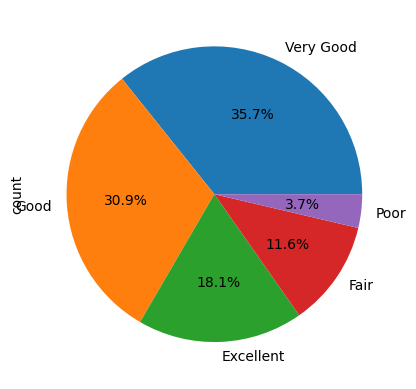

In [ ]:
df.General_Health.value_counts().plot(kind = "pie", autopct = "%1.1f%%")

<Axes: xlabel='General_Health'>

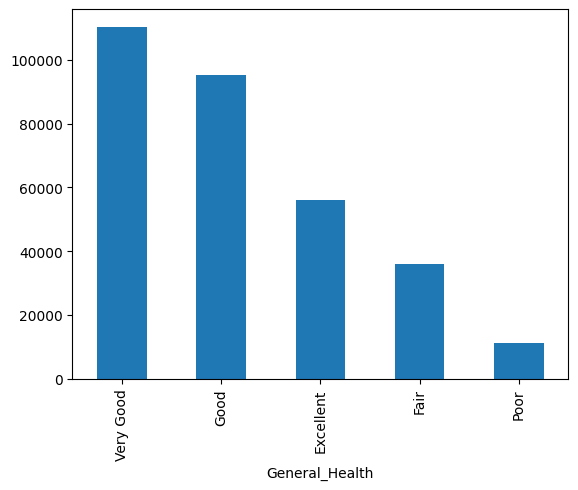

In [ ]:
df.General_Health.value_counts().plot(kind = "bar")

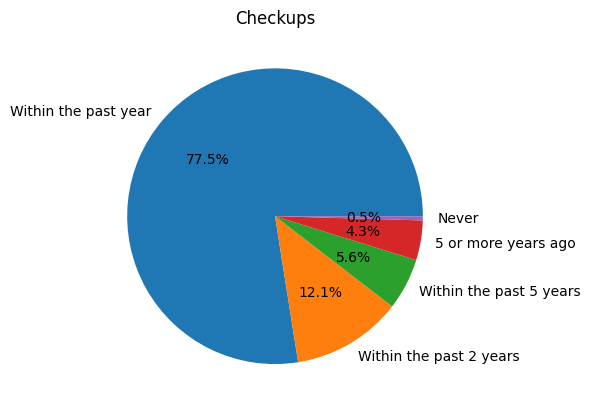

In [ ]:
plt.pie(df.Checkup.value_counts(), labels = df.Checkup.value_counts().index, autopct = "%1.1f%%")
plt.title("Checkups")
plt.show()

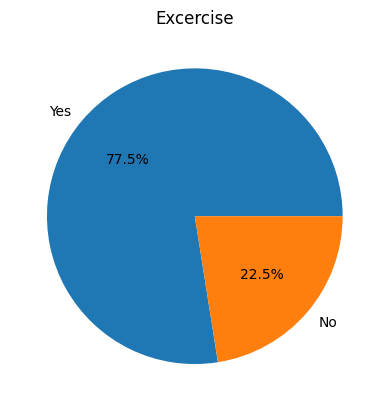

In [ ]:
plt.pie(df.Exercise.value_counts(), labels = df.Exercise.value_counts().index, autopct = "%1.1f%%")
plt.title("Excercise")
plt.show()

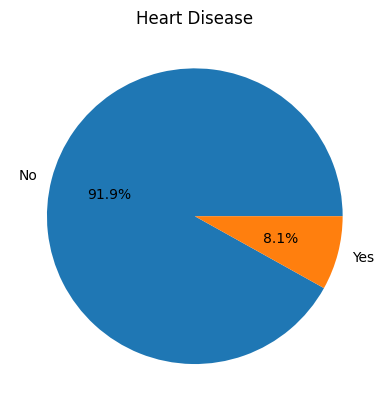

In [ ]:
plt.pie(df.Heart_Disease.value_counts(), labels = df.Heart_Disease.value_counts().index, autopct = "%1.1f%%")
plt.title("Heart Disease")
plt.show()



*   This pie chart illustrates that our dataset is imbalanced with respect to **heart disease** prediction.



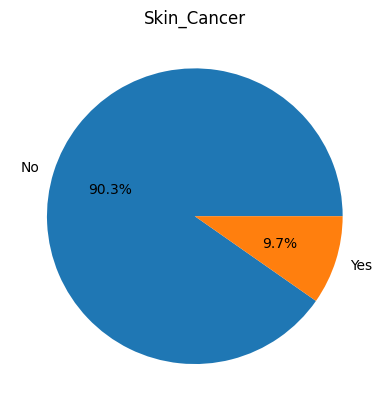

In [ ]:
plt.pie(df.Skin_Cancer.value_counts(), labels = df.Skin_Cancer.value_counts().index, autopct = "%1.1f%%")
plt.title("Skin_Cancer")
plt.show()



*   This pie chart illustrates that our dataset is imbalanced with respect to **Skin Cancer** prediction.



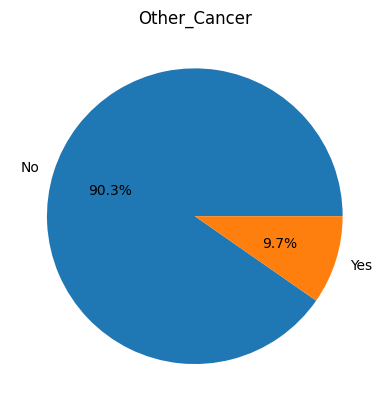

In [ ]:
plt.pie(df.Other_Cancer.value_counts(), labels = df.Other_Cancer.value_counts().index, autopct = "%1.1f%%")
plt.title("Other_Cancer")
plt.show()

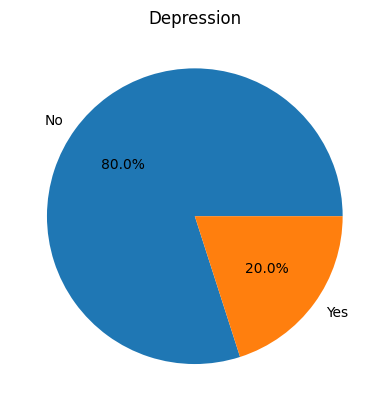

In [ ]:
plt.pie(df.Depression.value_counts(), labels = df.Depression.value_counts().index, autopct = "%1.1f%%")
plt.title("Depression")
plt.show()

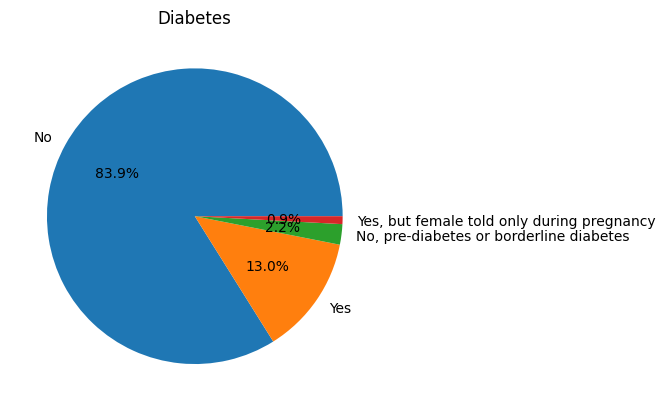

In [ ]:
plt.pie(df.Diabetes.value_counts(), labels = df.Diabetes.value_counts().index, autopct = "%1.1f%%")
plt.title("Diabetes")
plt.show()



*   **Pre-diabetes** is a condition where blood sugar levels are higher than normal but not high enough to be classified as diabetes.
*   **Borderline diabetes** refers to a similar state where glucose levels are near the threshold for diabetes.
*   **'Yes, but female told only during pregnancy'**: This indicates that the individual was diagnosed with diabetes only during pregnancy, which is known as gestational diabetes. Gestational diabetes occurs when a woman without previously diagnosed diabetes develops high blood sugar levels during pregnancy. It typically resolves after childbirth, but it can increase the risk of developing type 2 diabetes later in life.





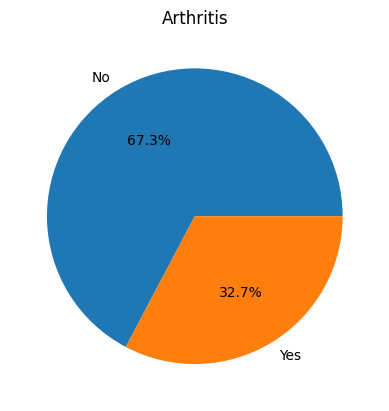

In [ ]:
plt.pie(df.Arthritis.value_counts(), labels = df.Arthritis.value_counts().index, autopct = "%1.1f%%")
plt.title("Arthritis")
plt.show()

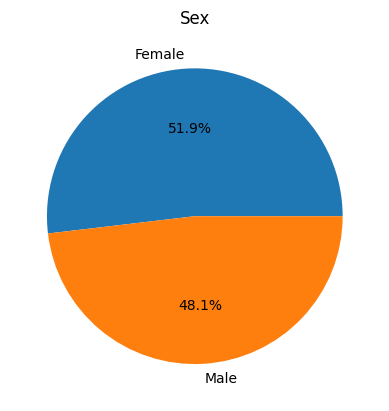

In [ ]:
plt.pie(df.Sex.value_counts(), labels = df.Sex.value_counts().index, autopct = "%1.1f%%")
plt.title("Sex")
plt.show()

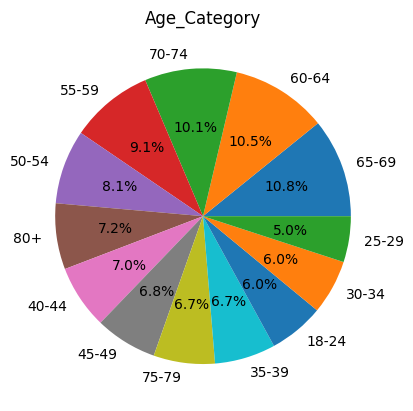

In [ ]:
plt.pie(df.Age_Category.value_counts(), labels = df.Age_Category.value_counts().index, autopct = "%1.1f%%")
plt.title("Age_Category")
plt.show()

* This column may hinder our analysis; we might consider feature engineering it at a later stage.

In [ ]:
(df["Height_(cm)"]*0.0328).rename(index = "Height_(ft)").describe()

,Height_(ft)
count,308774.000000
mean,5.596179
std,0.349597
min,2.984800
25%,5.346400
50%,5.576000
75%,5.838400
max,7.904800



*   I converted the height from cm to feet for easier interpretation. We will discuss later whether to keep it in feet or cm.
*   The minimum value is 2.98 ft, which is quite low, while the maximum value is 7.9 ft, which is relatively high. These outliers could affect the performance of our model.
*   It appears that the Height_(cm) column is normally distributed, as the median and mean are approximately the same.

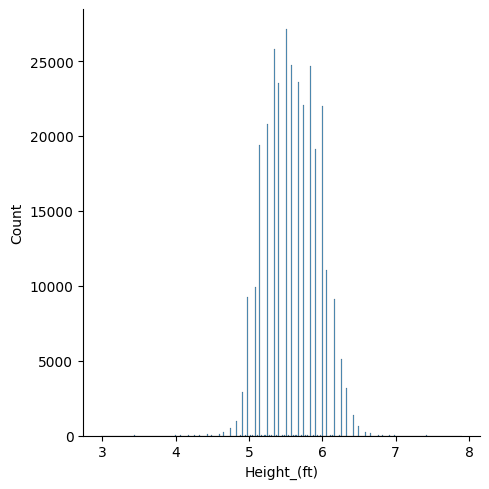

In [ ]:
sns.displot(df["Height_(cm)"]*0.0328)
plt.xlabel("Height_(ft)")
plt.show()

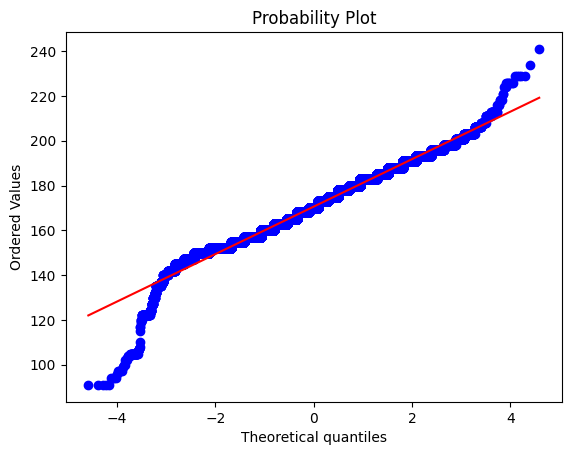

In [ ]:
stats.probplot(df["Height_(cm)"].values, dist = "norm", plot = plt)
plt.show()



*   The data appears to be somewhat normally distributed, as suggested by the Q-Q plot. However, it deviates from normality at the tails.


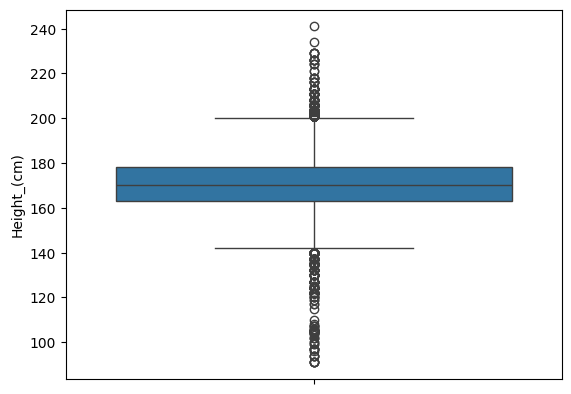

In [ ]:
sns.boxplot(df["Height_(cm)"])
plt.show()



*   The box plot shows that there are outliers in Height Column



In [ ]:
df["Weight_(kg)"].describe()

,Weight_(kg)
count,308774.000000
mean,83.590399
std,21.344664
min,24.950000
25%,68.040000
50%,81.650000
75%,95.250000
max,293.020000




*   The minimum weight is 24.9 kg, which is quite low, while the maximum value is 293.02 kg, which is relatively high. These outliers could affect the performance of our model.


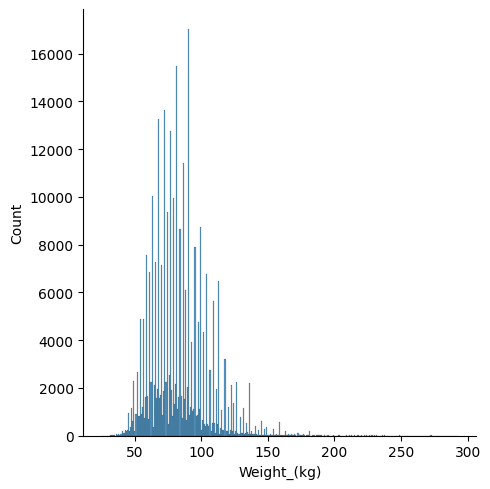

In [ ]:
sns.displot(df["Weight_(kg)"])
plt.xlabel("Weight_(kg)")
plt.show()



*   The data appears to be right-skewed. We might need to apply some transformation to the weight column to avoid bias when building the machine learning model.



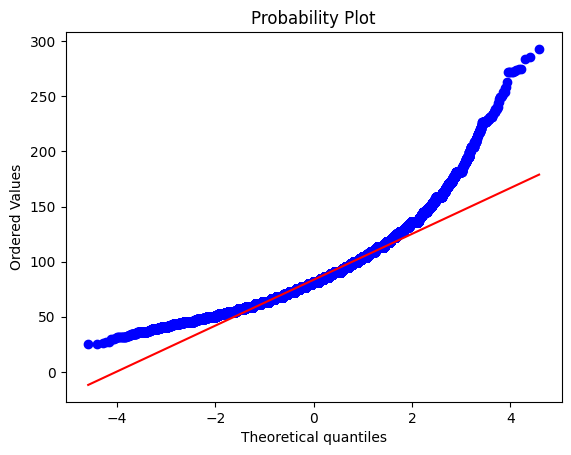

In [ ]:
stats.probplot(df["Weight_(kg)"].values, dist = "norm", plot = plt)
plt.show()

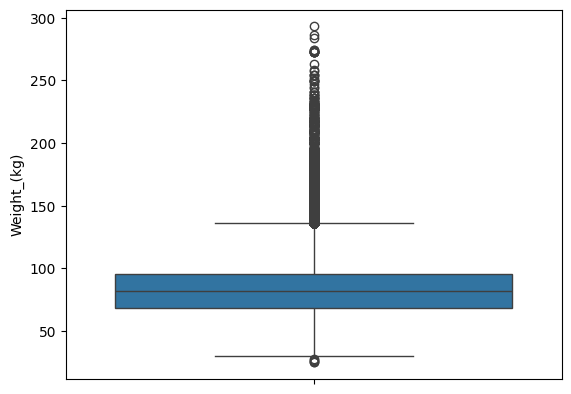

In [ ]:
sns.boxplot(df["Weight_(kg)"])
plt.show()



*   Since the data is right-skewed, there are outliers on the higher end.



In [ ]:
df["BMI"].describe()

,BMI
count,308774.000000
mean,28.626813
std,6.522810
min,12.020000
25%,24.210000
50%,27.440000
75%,31.850000
max,99.330000


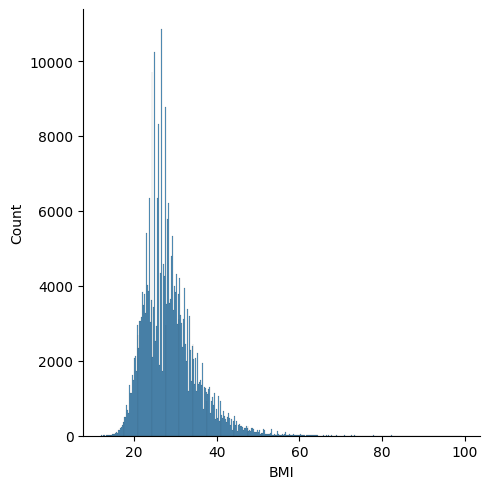

In [ ]:
sns.displot(df["BMI"])
plt.xlabel("BMI")
plt.show()

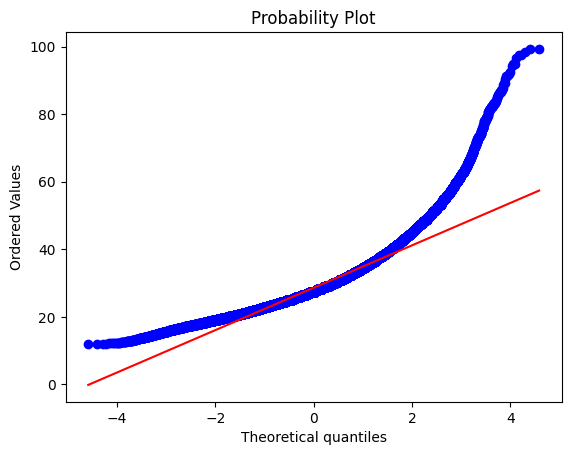

In [ ]:
stats.probplot(df["BMI"].values, dist = "norm", plot = plt)
plt.show()

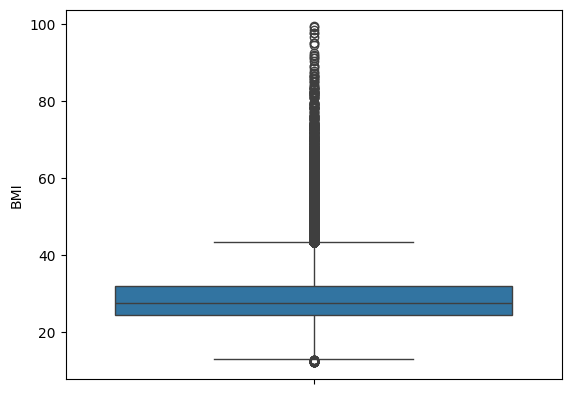

In [ ]:
sns.boxplot(df["BMI"])
plt.show()

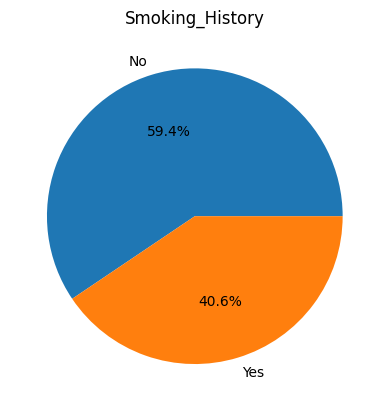

In [ ]:
plt.pie(df.Smoking_History.value_counts(), labels = df.Smoking_History.value_counts().index, autopct = "%1.1f%%")
plt.title("Smoking_History")
plt.show()

In [ ]:
df.Alcohol_Consumption.describe()

,Alcohol_Consumption
count,308774.000000
mean,5.097557
std,8.200434
min,0.000000
25%,0.000000
50%,1.000000
75%,6.000000
max,30.000000




*   Without additional context or documentation, the unit of measurement for the column of alcohol consumption remains ambiguous. The values provided (ranging from 0 to 30) could fit multiple scales, such as milliliters, ounces, or even a percentage if considering some other forms of measurement.
*   Multivariate analysis could help us determine the correct unit of measurement for this column.





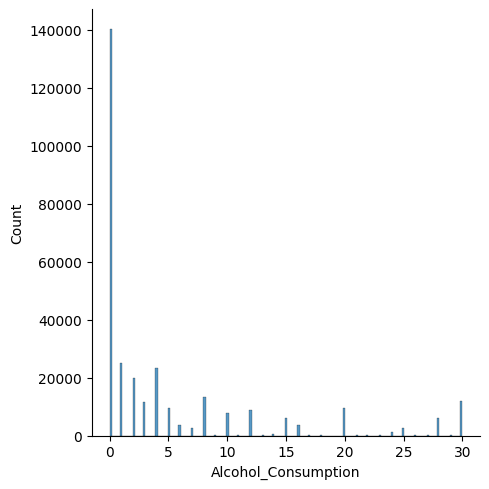

In [ ]:
sns.displot(df["Alcohol_Consumption"])
plt.xlabel("Alcohol_Consumption")
plt.show()



*   



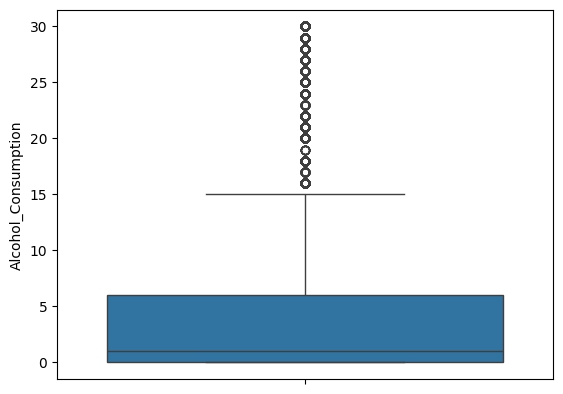

In [ ]:
sns.boxplot(df["Alcohol_Consumption"])
plt.show()

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
df.Fruit_Consumption.describe()

,Fruit_Consumption
count,308774.000000
mean,29.834290
std,24.877812
min,0.000000
25%,12.000000
50%,30.000000
75%,30.000000
max,120.000000


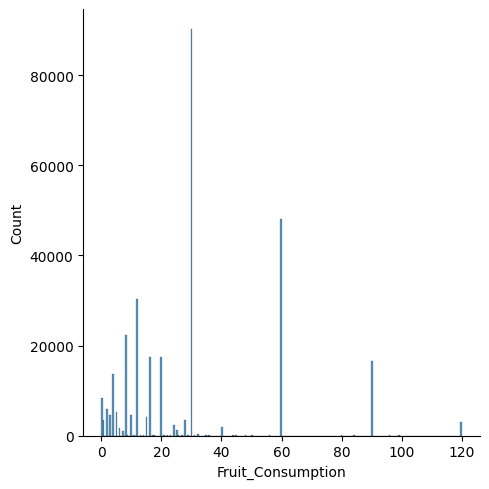

In [ ]:
sns.displot(df["Fruit_Consumption"])
plt.xlabel("Fruit_Consumption")
plt.show()

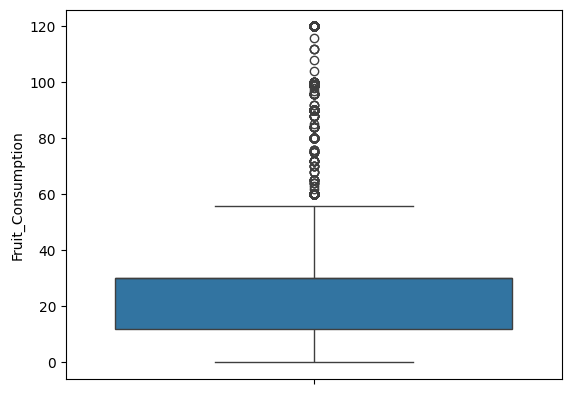

In [ ]:
sns.boxplot(df['Fruit_Consumption'])
plt.show()

In [ ]:
df.Green_Vegetables_Consumption.describe()

,Green_Vegetables_Consumption
count,308774.000000
mean,15.109517
std,14.926912
min,0.000000
25%,4.000000
50%,12.000000
75%,20.000000
max,128.000000


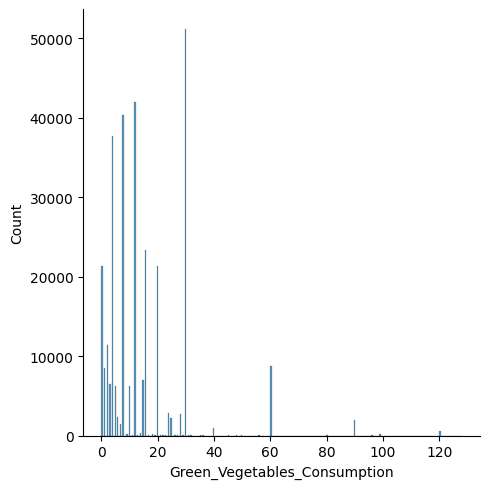

In [ ]:
sns.displot(df["Green_Vegetables_Consumption"])
plt.xlabel("Green_Vegetables_Consumption")
plt.show()

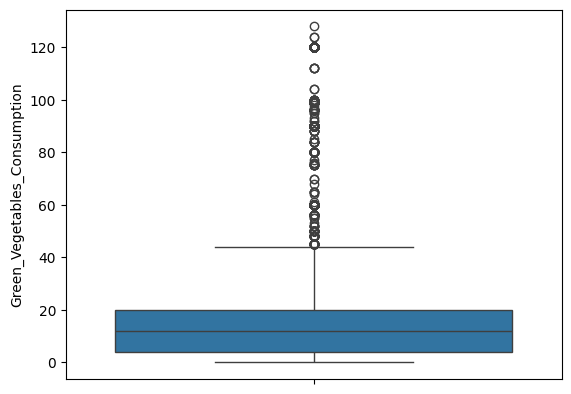

In [ ]:
sns.boxplot(df['Green_Vegetables_Consumption'])
plt.show()

In [ ]:
df.FriedPotato_Consumption.describe()

,FriedPotato_Consumption
count,308774.000000
mean,6.297237
std,8.583837
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,128.000000


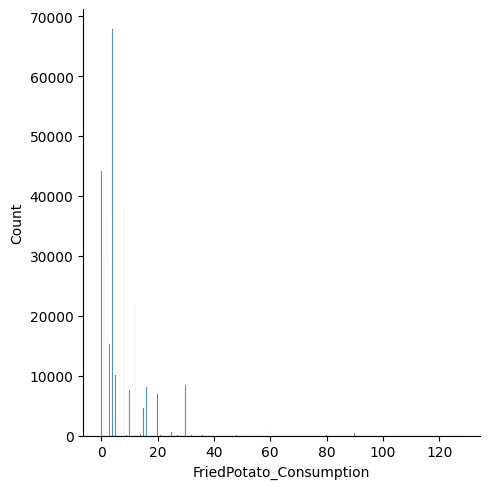

In [ ]:
sns.displot(df["FriedPotato_Consumption"])
plt.xlabel("FriedPotato_Consumption")
plt.show()

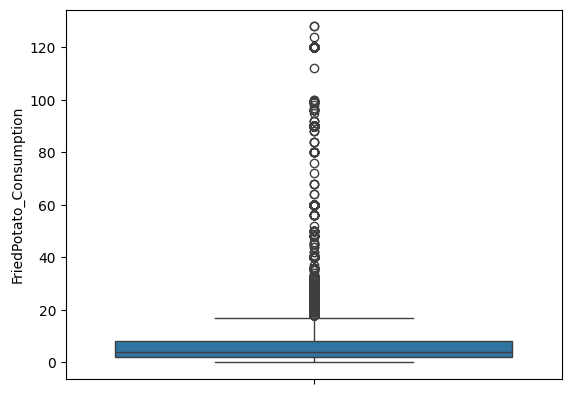

In [ ]:
sns.boxplot(df['FriedPotato_Consumption'])
plt.show()